In [87]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

print("This is as of " + str(datetime.now()))

This is as of 2017-06-25 08:56:32.866641


In [88]:
# Get the latest data from the Chicago data portal right now
%run "Get beach_days from API.ipynb"
beach_days.head()

Deleting columns: 
There are 20 beaches


,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
0,85.994186,3226,"{'type': 'Point', 'coordinates': [-87.5636, 41...",2017-06-24,South Shore,NaN
1,2365.059407,3225,"{'type': 'Point', 'coordinates': [-87.5299, 41...",2017-06-24,Calumet,NaN
2,1554.232286,3245,"{'type': 'Point', 'coordinates': [-87.551, 41....",2017-06-24,Rainbow,NaN
3,324.910757,3246,"{'type': 'Point', 'coordinates': [-87.5748, 41...",2017-06-24,63rd Street,NaN
4,200.192407,3227,"{'type': 'Point', 'coordinates': [-87.5797, 41...",2017-06-24,57th Street,131.5


In [89]:
# Reminder that there are some beaches that don't have predictions
list(beach_days.loc[beach_days['predicted_level'].isnull()]['beach_name'].unique())

['South Shore', 'Calumet', 'Rainbow', '63rd Street', 'Humboldt', 'Montrose']

In [90]:
# Pick a beach to analyze
print("Available beaches: " + ', '.join(beach_days['beach_name'].unique()))
selected_beach_name = 'Margaret T Burroughs (31st)'
print("Analyzing " + selected_beach_name)

Available beaches: South Shore, Calumet, Rainbow, 63rd Street, 57th Street, Humboldt, Leone, 12th Street, Margaret T Burroughs (31st), Osterman, Ohio Street, Hartigan (Albion), North Avenue, Marion Mahony Griffin (Jarvis), Rogers, Foster, Montrose, Oakwood, Oak Street, Howard
Analyzing Margaret T Burroughs (31st)


In [91]:
beach = beach_days.loc[beach_days['beach_name'] == selected_beach_name]
beach.head()

,dna_reading_mean,dna_test_id,location,date,beach_name,predicted_level
8,422.583720,3248,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-24,Margaret T Burroughs (31st),304.6
32,988.658182,3207,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-23,Margaret T Burroughs (31st),330.4
41,283.971830,3119,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-22,Margaret T Burroughs (31st),65.0
73,1732.965089,3069,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-21,Margaret T Burroughs (31st),246.2
94,35.213634,3066,"{'type': 'Point', 'coordinates': [-87.6072, 41...",2017-06-20,Margaret T Burroughs (31st),462.7


In [92]:
first_day = beach_days.sort_values('date', ascending=True).iloc[0]['date']
today = datetime.now().date()
delta = today - first_day
dates = pd.DataFrame([(first_day + timedelta(days=i)) for i in range(delta.days + 1)])
dates.columns = ['date']
beach_by_day = dates.merge(beach, how='left', on='date')
beach_by_day = beach_by_day.set_index('date', drop=False)
beach_by_day = beach_by_day[['date', 'dna_reading_mean', 'predicted_level']]
beach_by_day = beach_by_day.fillna(0)
beach_by_day.head()

,date,dna_reading_mean,predicted_level
date,,,
2017-05-26,2017-05-26,11.489125,184.6
2017-05-26,2017-05-26,11.489125,184.6
2017-05-27,2017-05-27,0.000000,0.0
2017-05-28,2017-05-28,68.161573,96.6
2017-05-29,2017-05-29,129.011627,197.7


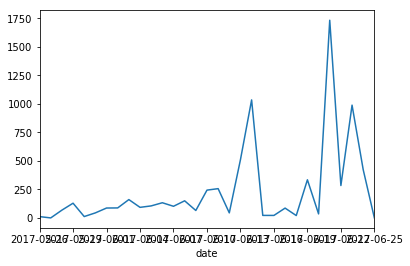

In [93]:
beach_by_day['dna_reading_mean'].plot(kind="line")

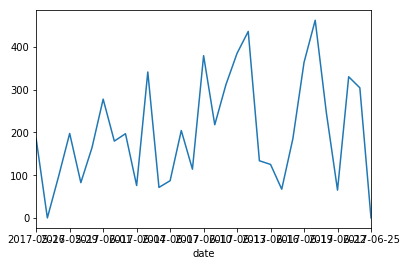

In [94]:
beach_by_day['predicted_level'].plot(kind="line")

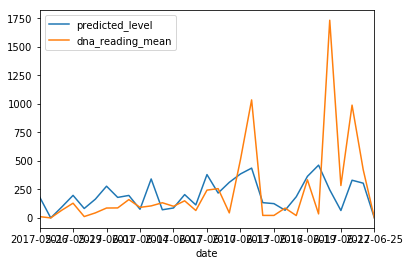

In [95]:
fig, ax = plt.subplots(1, 1)
beach_by_day['predicted_level'].plot(ax=ax, legend=True)
beach_by_day['dna_reading_mean'].plot(ax=ax, legend=True)

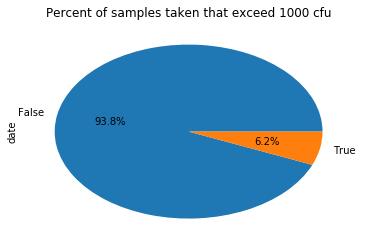

In [96]:
# Samples that exceed threshold
beach_by_day['dna_exceeds'] = beach_by_day['dna_reading_mean'] > 1000
beach_by_day.groupby('dna_exceeds').count()['date'].plot(kind="pie", title="Percent of samples taken that exceed 1000 cfu", autopct='%1.1f%%')